# Visualization of events, station, rays in csv files 


##  Fei Zhang
### 2018-09-06

In this Jupyter Notebook, we demostrate three alternative ways to visulaize the seismic events, stations, and rays:

-  1. Python Pandas plot function (current cluster script)
-  2. GMT python interface
-  3. Geopandas mapping 


## installation of gmt-6 and python interface gmt-python

- conda install gmt -c conda-forge/label/dev
- conda install numpy pandas xarray
- pip install https://github.com/GenericMappingTools/gmt-python/archive/master.zip


## installation of geopandas

-  conda install geopandas
-  conda install jupyter





In [1]:
!which python

/g/data1a/ha3/fxz547/miniconda3/bin/python


In [2]:
!python -V

Python 3.6.4 :: Anaconda, Inc.


In [3]:
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

from IPython.display import display

%matplotlib inline

In [4]:
#from seismic.cluster.cluster import Grid2 
import sys
sys.path.append("/Softlab/Githubz/passive-seismic")

from seismic.traveltime.sort_rays import sort,sort2

In [5]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
    
    # tweek below
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']
    
    finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  separator = comma,
    #finalpdf =  pd.read_csv(csvfile,  sep='\s+', header=None,  names=col_names) # white space
    
    return finalpdf  #pandas_data_frame

In [6]:
# P wave
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/seismic_events_arrivals_P_0.csv'
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/tempworks/outfile_P.csv'
inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/P_out.csv'
#inputcsv='/Softlab/travel_time_tomography/PST/CSV_New_FZ01-pst-cluster2_run3/P_out.csv'
residual_cutoff=5.0  # cutoff value for P is 5s
sortedfile='sortedfile_P.csv'
sortedfile2= 'sortedfile2_P.csv'



# for S wave
# #inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/run5_events_1deg/outfile_S.csv'
# inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/S_out.csv'
# residual_cutoff=10.0
# sortedfile='sortedfile_S.csv'
# sortedfile2= 'sortedfile2_S.csv'

In [7]:
finalpdf = sort(inputcsv,sortedfile,residual_cutoff)   # select the median travel time
finalpdf2 = sort2(inputcsv,sortedfile,residual_cutoff)  # select the best SNR ray

#sort again should get identical rows. ALL reduced to a minimum set
#pdf2=sort2(sortedfile, sortedfile2, residual_cutoff )

# OR read in from already sorted (zoned) csv file
# finalpdf = csv2pdf(inputcsv)

In [8]:
finalpdf.shape

(171245, 14)

In [9]:
finalpdf.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,locations2degrees,station_code,SNR,P_or_S
7339,52342,99830,0.300000,1270453826,125.2391,-0.0797,0.0,117.239000,-32.927700,402.372445,33.701074,NWAO,72.090342,1
418698,52348,80819,2.057903,1385508039,126.7594,-0.0716,0.0,134.380790,-19.813942,290.229934,21.106887,WB8,8.553545,1
418692,52348,81178,0.739349,1385508039,126.7594,-0.0716,0.0,134.346420,-19.959444,290.211064,21.230424,WB1,6.037525,1
418705,52348,81179,0.690286,1385508039,126.7594,-0.0716,0.0,134.386910,-19.948503,290.201214,21.234152,WR3,15.434746,1
52561,52604,31161107,0.150000,1345823704,100.7719,-0.1757,0.0,101.039597,0.326200,11.006565,0.568827,BKNI,49.615829,1


In [10]:
finalpdf2.shape

(182714, 14)

In [11]:
finalpdf2.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,locations2degrees,station_code,SNR,P_or_S
405703,130100,164337,0.051640,1077450326,124.7496,-0.0891,2.3538,133.92126,-23.672871,327.983316,25.208062,AS03,7.397719,1
405702,130100,175544,2.500000,1077450326,124.7496,-0.0891,2.3538,145.69160,-31.537500,434.034426,37.173454,CMSA,10.218068,1
7339,130102,177590,0.300000,1270453826,125.2391,-0.0797,0.0000,117.23900,-32.927700,402.372445,33.701074,NWAO,72.090342,1
418698,130108,158579,2.057903,1385508039,126.7594,-0.0716,0.0000,134.38079,-19.813942,290.229934,21.106887,WB8,8.553545,1
418701,130108,158938,0.641386,1385508039,126.7594,-0.0716,0.0000,134.37194,-19.958742,290.198345,21.238529,WC3,16.256102,1


In [12]:
# OR read in from a given csv file directly
finalpdf0 = csv2pdf(inputcsv)

In [13]:
finalpdf0.shape

(425348, 14)

In [14]:
finalpdf0.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,locations2degrees,station_code,SNR,P_or_S
0,477978,174393,2.986946,1438400325,154.2784,-25.4437,19957.9,128.0590,-30.7790,313.529507,23.674288,FORT,5.256926,1
1,477978,170895,-5.449775,1438400325,154.2784,-25.4437,19957.9,153.5115,-28.1617,44.488666,2.802841,GC1S,8.590258,1
2,477978,170535,-5.074421,1438400325,154.2784,-25.4437,19957.9,153.3958,-27.9122,41.236173,2.591385,GC2F,44.464834,1
3,477978,174074,5.470825,1438400325,154.2784,-25.4437,19957.9,138.2162,-30.4472,218.438131,15.028052,LCRK,6.715174,1
4,477978,173697,-2.296145,1438400325,154.2784,-25.4437,19957.9,134.0585,-30.2818,255.477280,18.489745,MULG,6.463297,1


# Begin to Visualize the data

In [15]:
# Define which dataframe to view??
pdf2= finalpdf0

In [16]:
# plt.figure(); pdf2.plot(x='event_number', y='observed_tt')
# plt.figure(); pdf2.plot(x='event_number', y='source_depth')
# plt.figure(); pdf2.plot(x='event_number', y='locations2degrees')

# plt.figure(); pdf2.plot.scatter(x='event_number', y='residual',figsize=(12,8))  # less than +-10s

In [17]:
# plt.figure(); pdf2.plot.scatter(x='event_number', y='source_block',figsize=(12,8))

In [18]:
# plt.figure(); pdf2.plot.scatter(x='source_block', y='station_block',figsize=(12,8))

# 1. Python Pandas package plot function (with basemap) 

<Figure size 432x288 with 0 Axes>

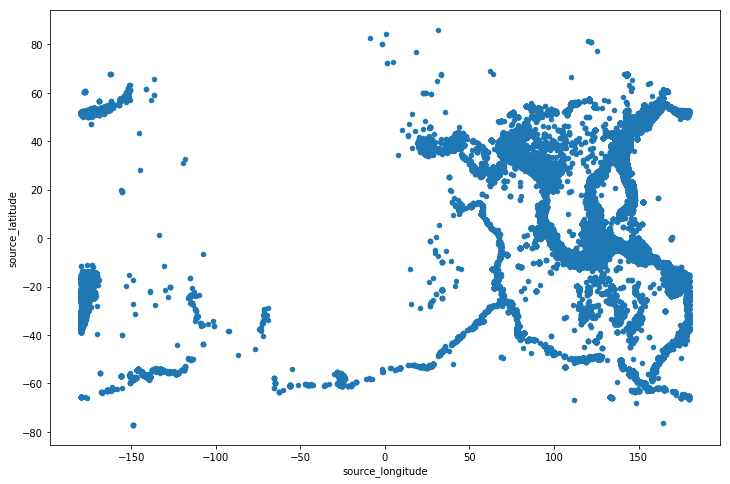

In [19]:
plt.figure(); pdf2.plot.scatter(x='source_longitude', y='source_latitude',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

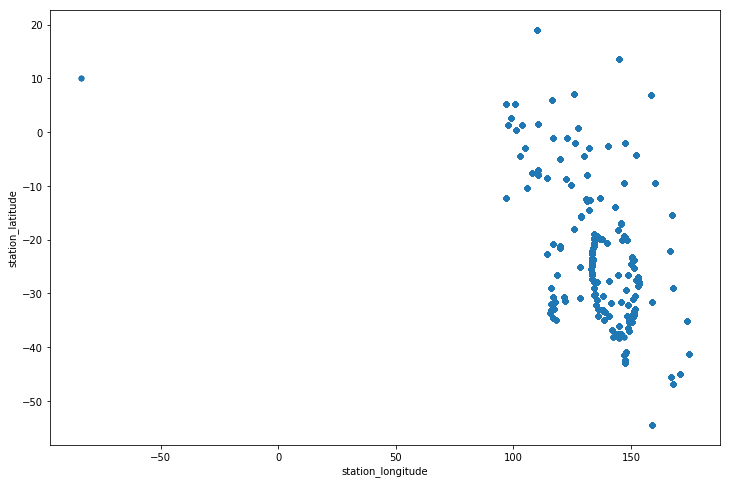

In [20]:
plt.figure(); pdf2.plot.scatter(x='station_longitude', y='station_latitude',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

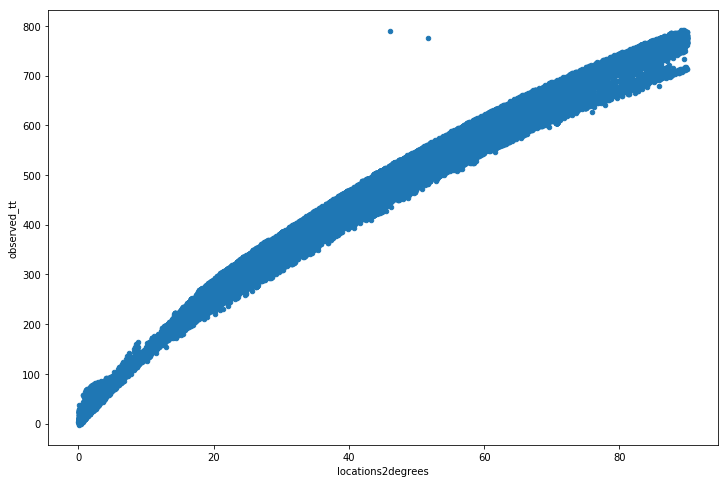

In [21]:
plt.figure(); pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))

# 2. GMT-python plotting

## Require to conda install gmt-python module in anaconda python
## gmt version-6 will be installed.

In [22]:
import gmt

In [23]:
my_region = [pdf2.source_longitude.min() , pdf2.source_longitude.max() ,
            pdf2.source_latitude.min() - 1, pdf2.source_latitude.max() + 1]

In [24]:
print (my_region)

[-179.9995, 179.9997, -78.1883, 87.0232]


/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/gmt/clib/utils.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return vector.as_matrix()


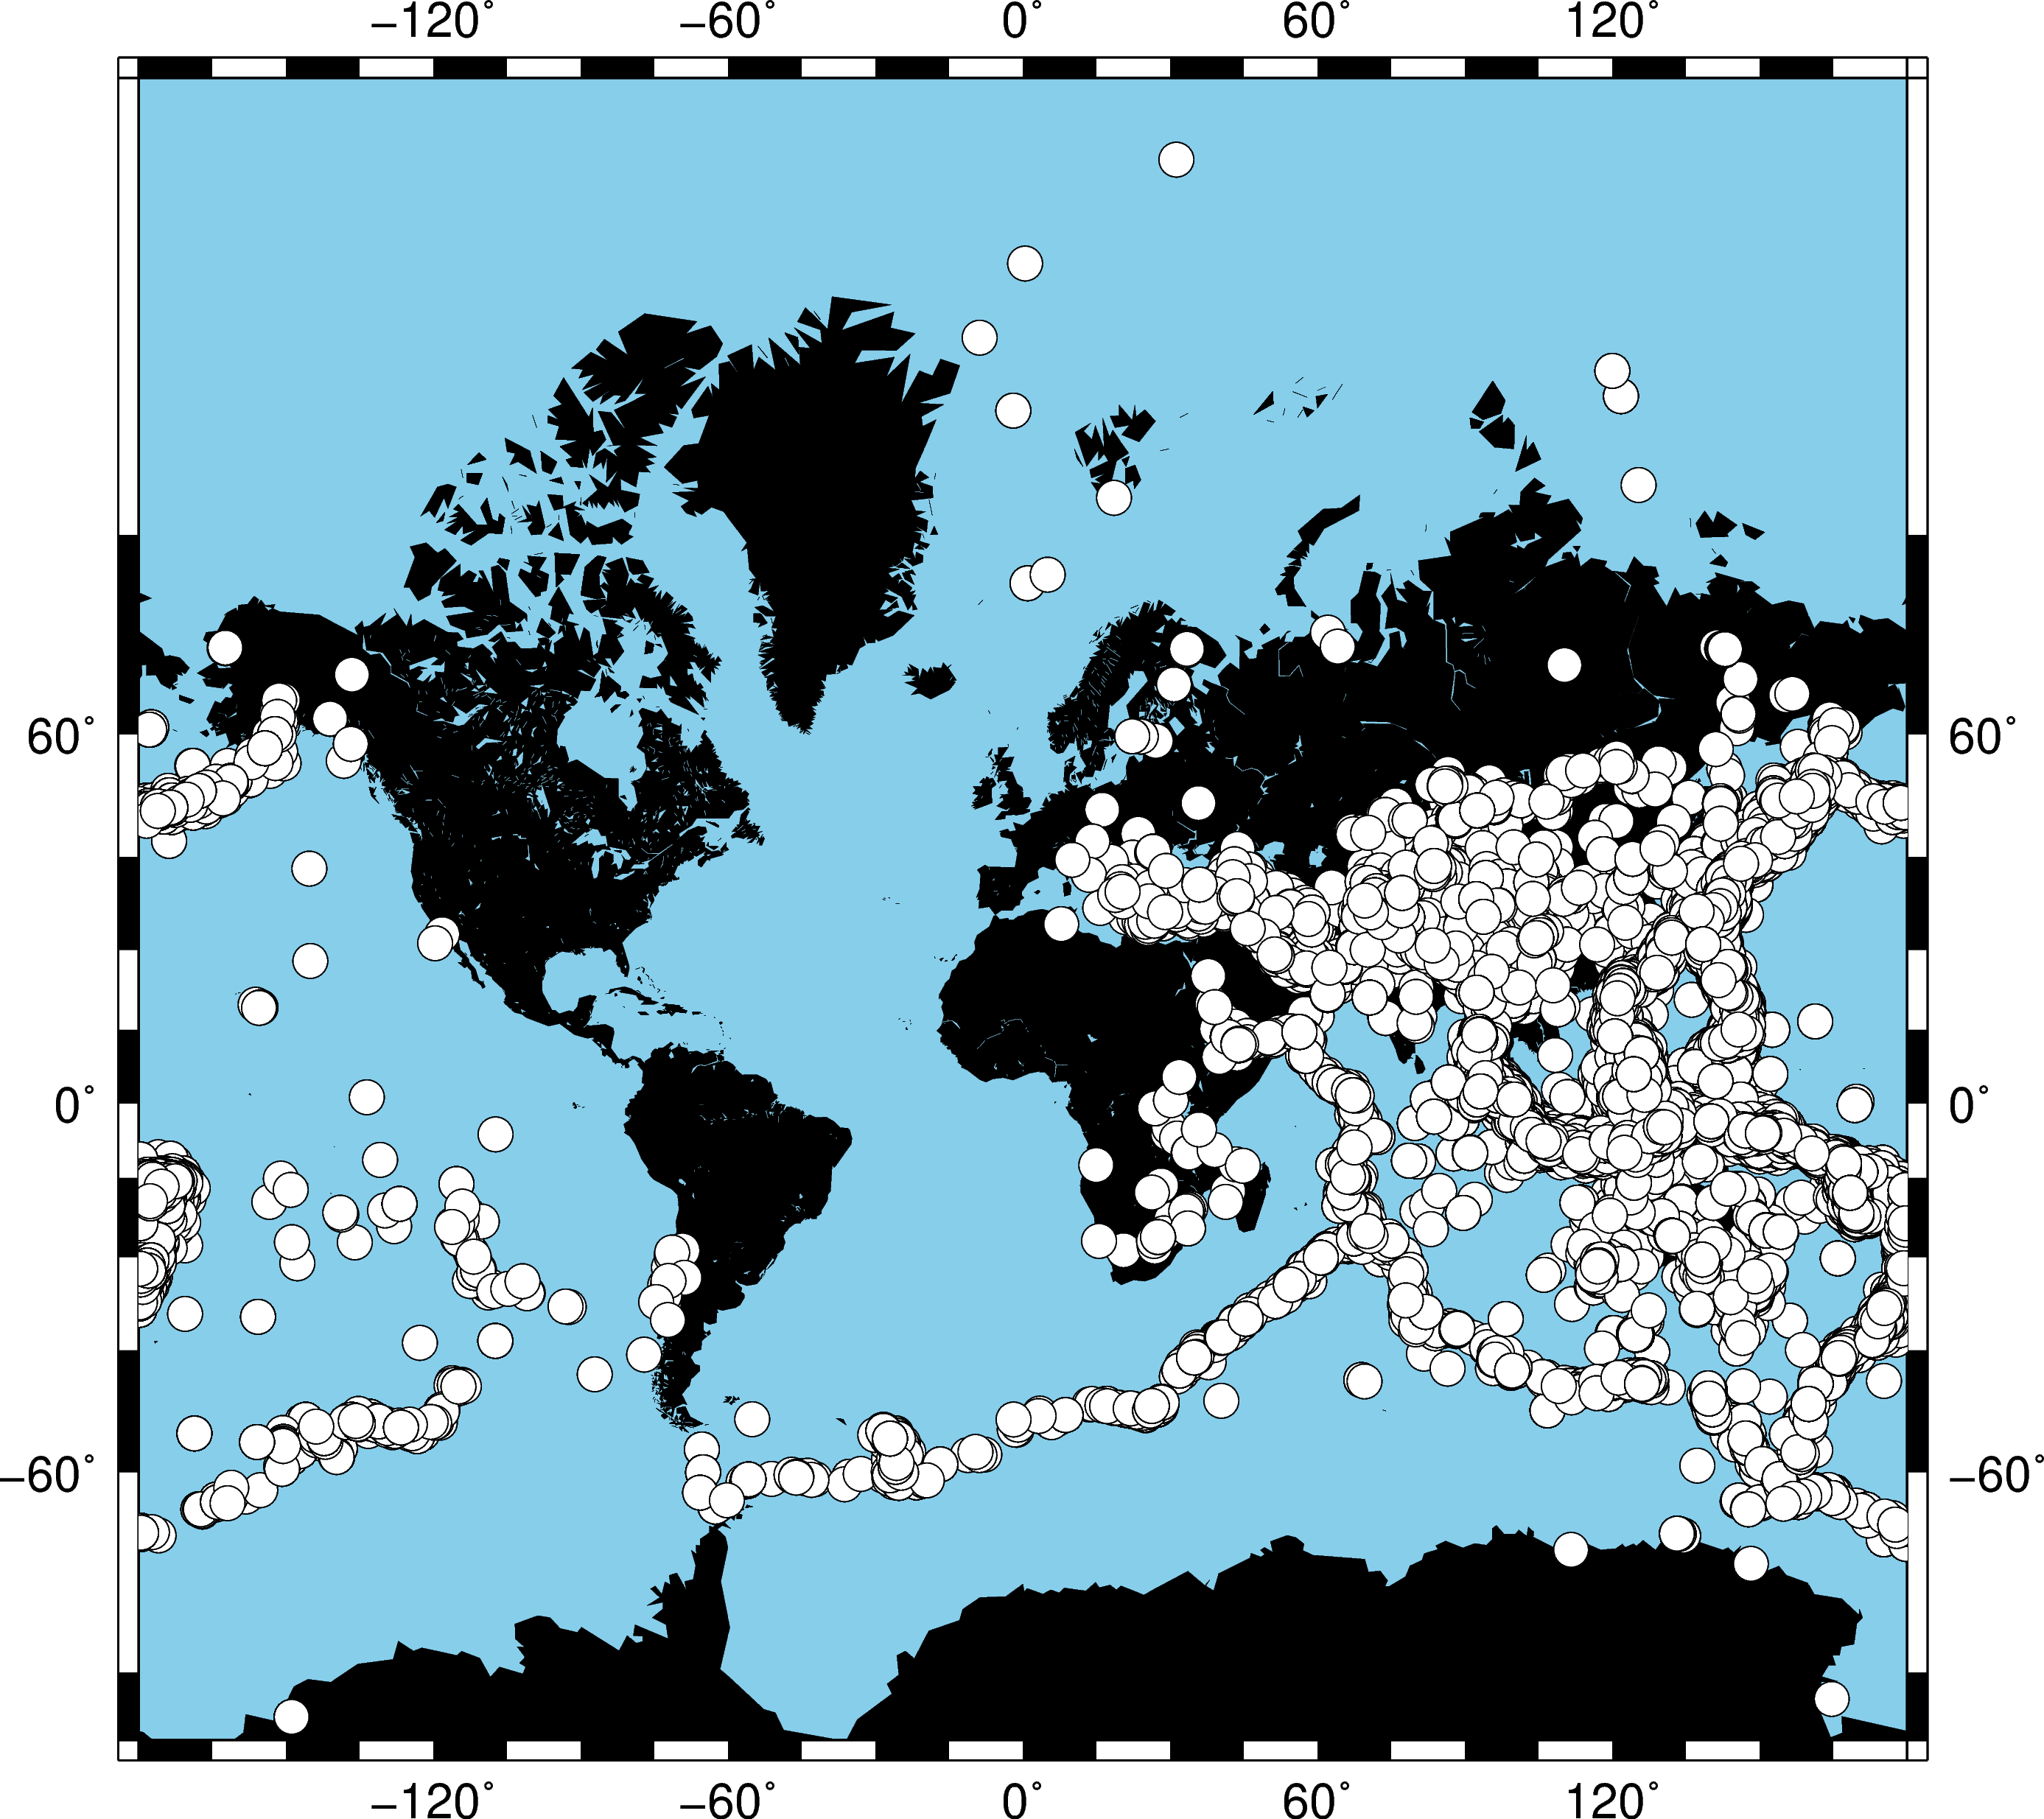

In [25]:
fig = gmt.Figure()
fig.coast(region=my_region, projection='M6i', frame=True, 
          land='black', water='skyblue')
fig.plot(x=pdf2.source_longitude, y=pdf2.source_latitude, 
         style='c0.3c', color='white', pen='black')

fig.savefig("events.png")

fig.show(dpi=400, width=1000)

/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/gmt/clib/utils.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return vector.as_matrix()


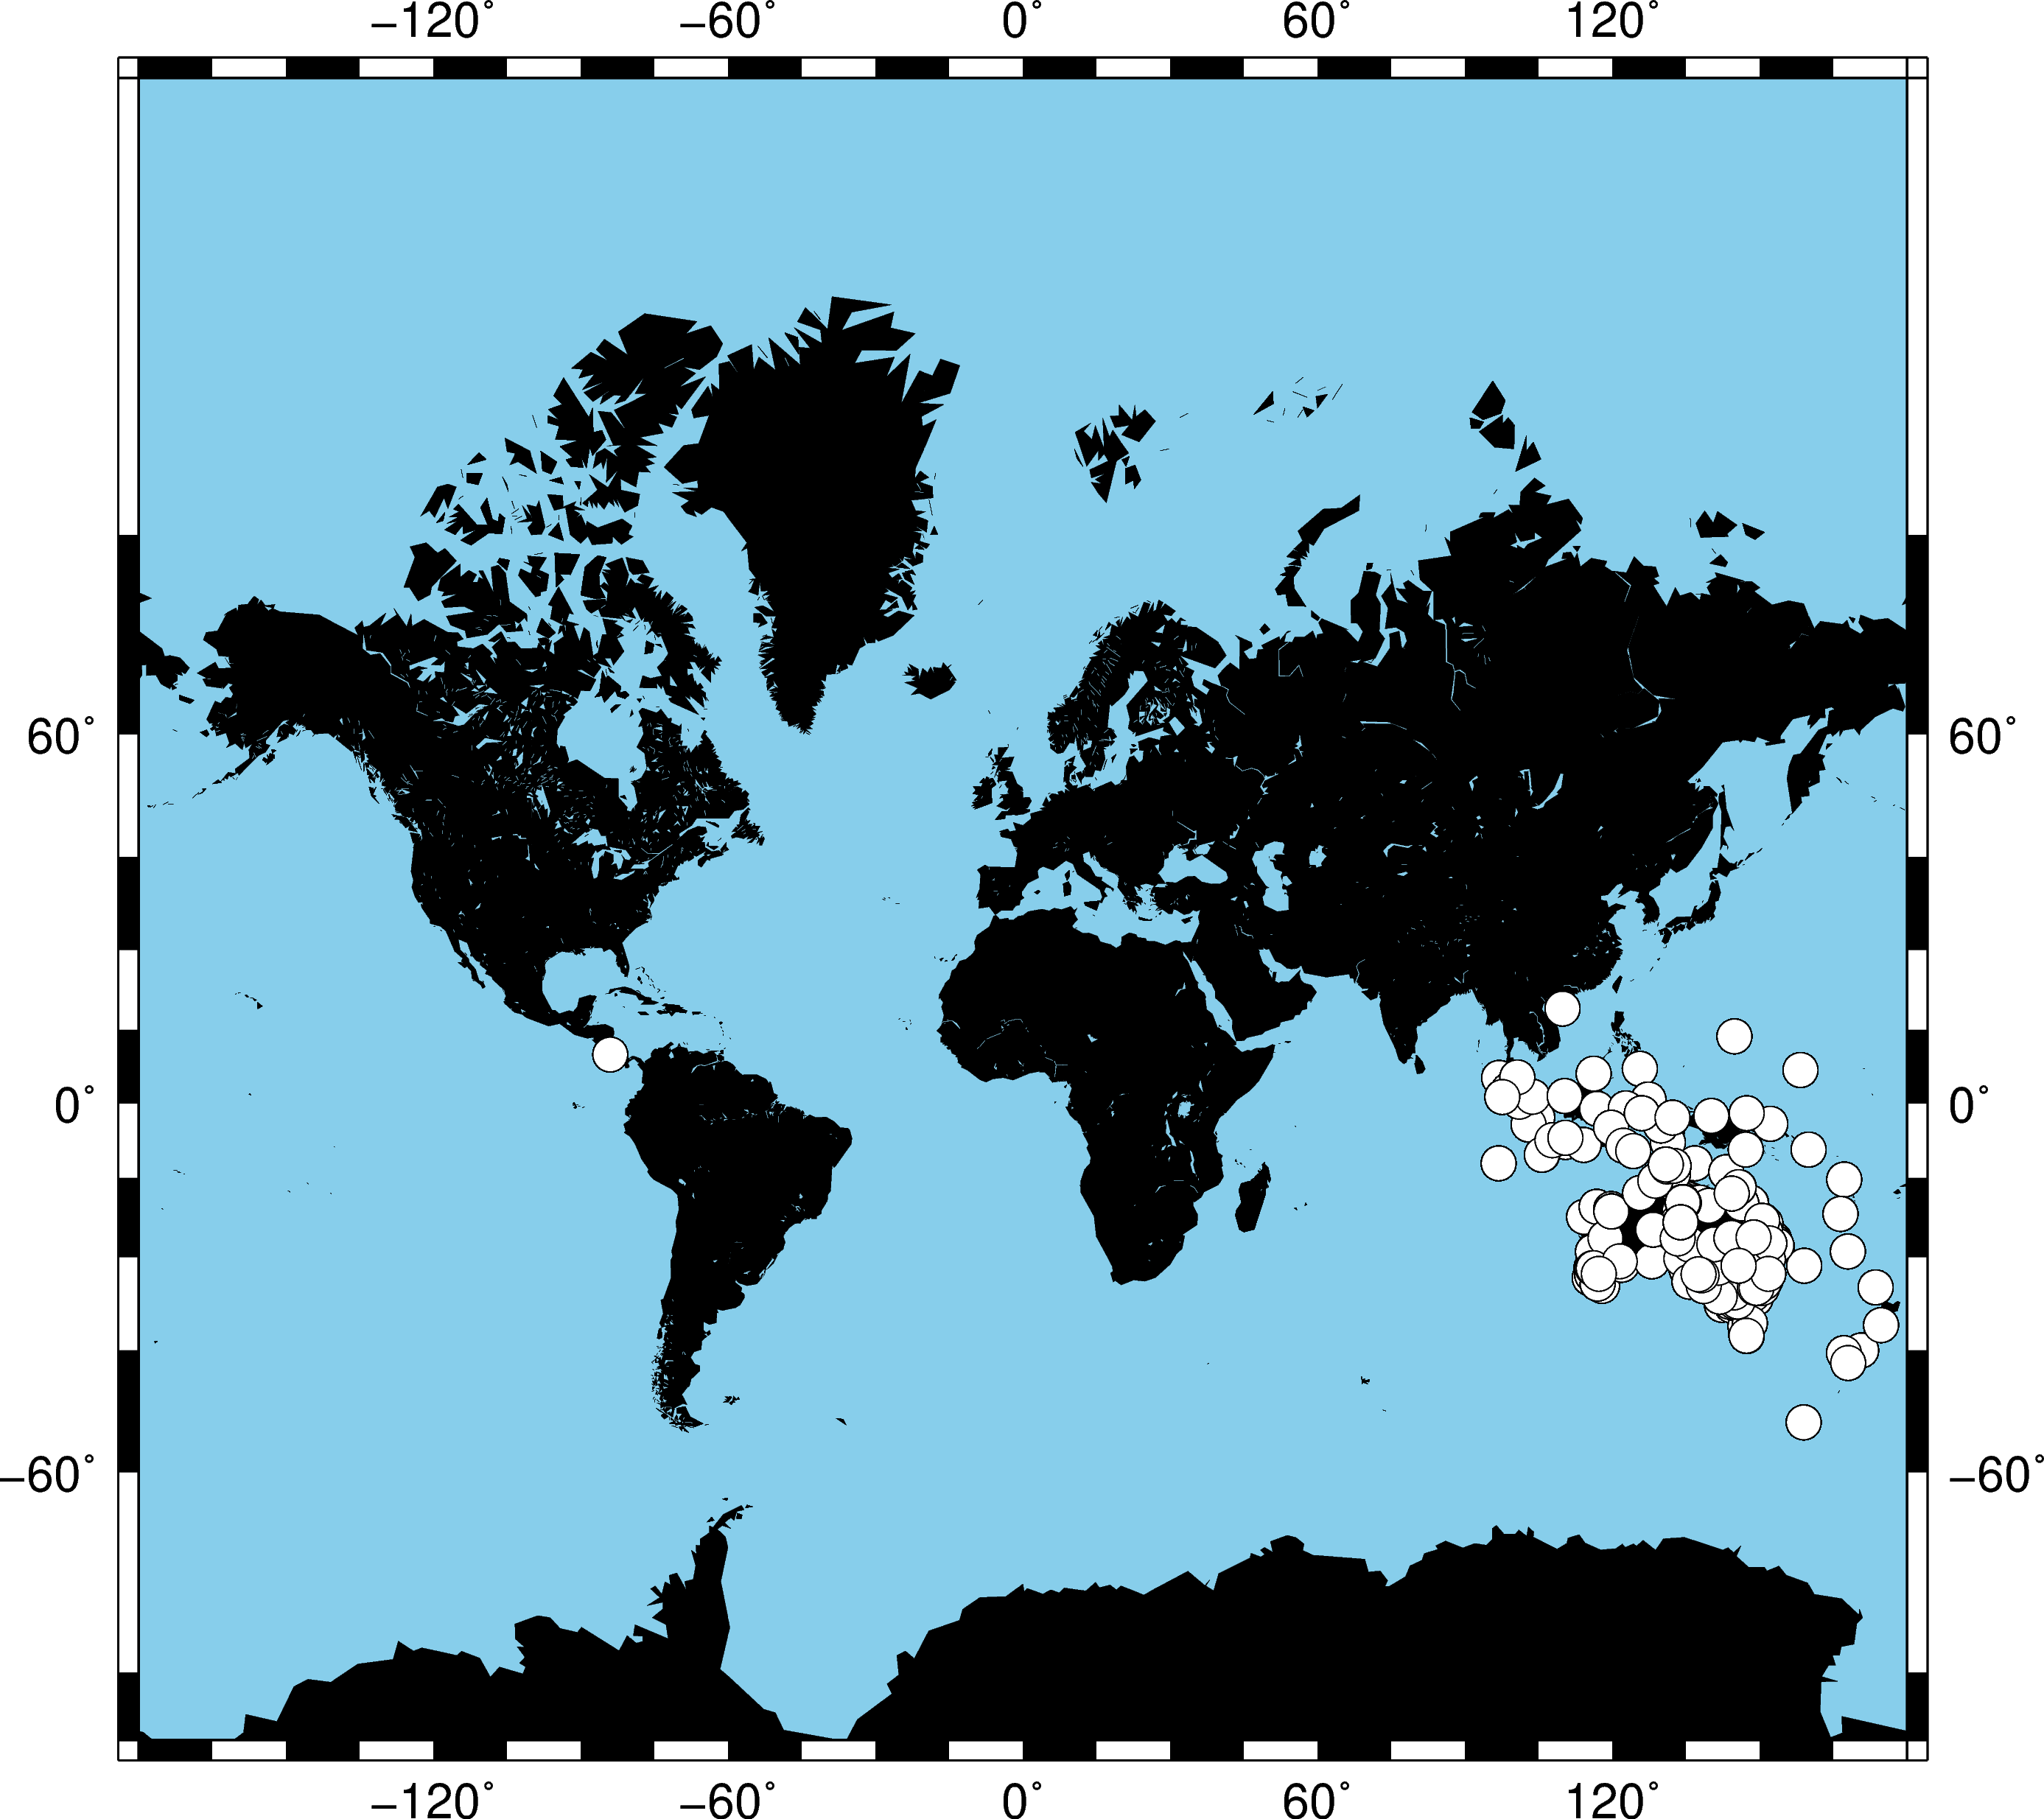

In [26]:
fig = gmt.Figure()
fig.coast(region=my_region, projection='M6i', frame=True,land='black', water='skyblue')
fig.plot(x=pdf2.station_longitude, y=pdf2.station_latitude, 
         style='c0.3c', color='white', pen='black')

fig.savefig("station.png")
fig.show(dpi=400, width=1000)

##   Interactive World Wind Globe

In [27]:
fig = gmt.Figure()
fig.coast(projection='M6i', frame=True, 
          land='black', water='skyblue')
fig.plot(x=pdf2.source_longitude, y=pdf2.source_latitude, 
         style='c0.3c', color='white', pen='black')
fig.show(method='globe',dpi=400, width=1000)

/g/data1a/ha3/fxz547/miniconda3/lib/python3.6/site-packages/gmt/clib/utils.py:240: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return vector.as_matrix()


# 3. Geopandas and Maps

In [28]:
import geopandas as gpd

In [29]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [30]:
event_locations = [Point(xy) for xy in zip(pdf2.source_longitude, pdf2.source_latitude)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

In [31]:
# myax = geopdf.plot(figsize=[20,10])


# myax.set_xlabel('Longitude')
# myax.set_ylabel('Latitude')
# title_str= "event locations"
# myax.set_title(title_str)

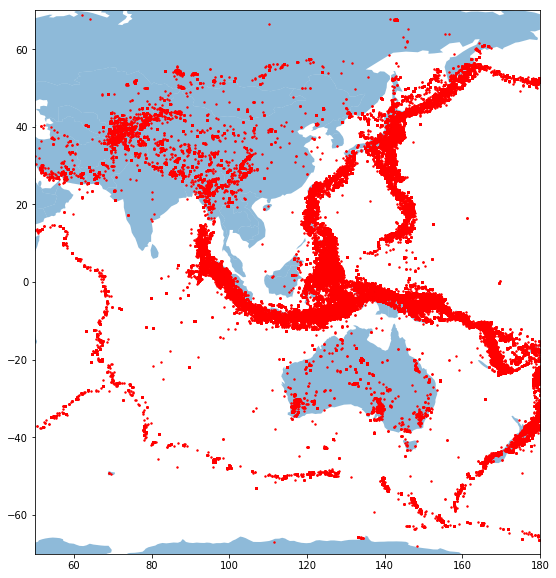

In [32]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([50,180])
myax.set_ylim([-70,70])
              
geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [33]:
mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf2['ray']= pdf2.apply(lambda x: LineString([(x.source_longitude, x.source_latitude), 
                (x.station_longitude, x.station_latitude)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry='ray')

In [34]:
# myax=geopdf_ray.plot(figsize=[20,10])

# myax.set_xlabel('Longitude')
# myax.set_ylabel('Latitude')
# title_str= "event->station Rays"
# myax.set_title(title_str)

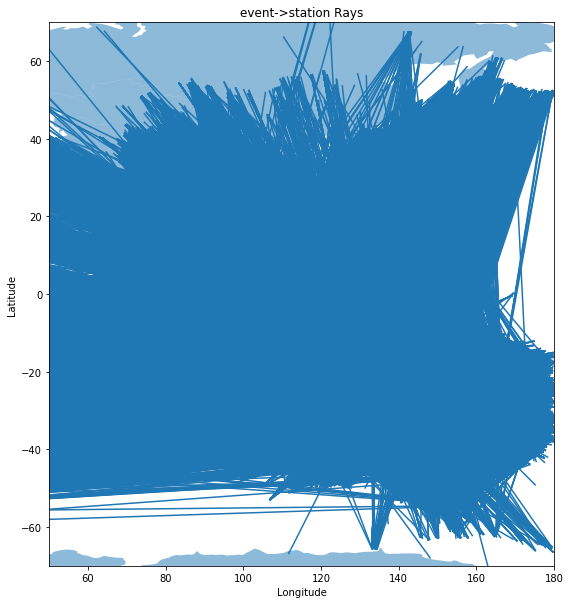

In [41]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 10))

# mymap.set_xlim([-180,180])
# mymap.set_ylim([-80,80])

mymap.set_xlim([50,180])
mymap.set_ylim([-70,70])

mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)

# Other Things

In [36]:
x=124.6; y=-0.0891; z=2353.8

In [37]:
i=round(x/0.25)+1; print (i)

499


In [38]:
print (i)

499


In [39]:
j=round((90-y)/0.25) +1; print (j)

361
